In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'G:\machine learning\kaggle\House Prices-Advanced Regression Techniques\train.csv')
test = pd.read_csv(r'G:\machine learning\kaggle\House Prices-Advanced Regression Techniques\test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
import warnings
def ignore_warn(*arg, **kwargs):
    pass
warnings.warn = ignore_warn
color = sns.color_palette
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
pd.set_option('display.float_format', lambda x:'{:3f}'.format(x))

In [6]:
train_ID, test_ID = train['Id'], test['Id']
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

In [9]:
train.shape, test.shape

((1458, 80), (1459, 79))

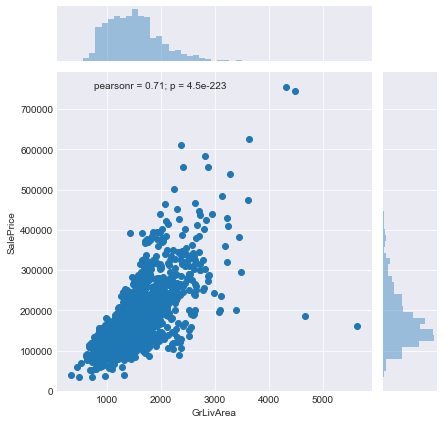

In [7]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=train)

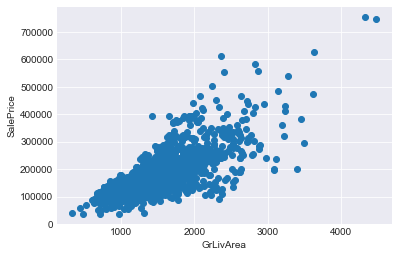

In [8]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

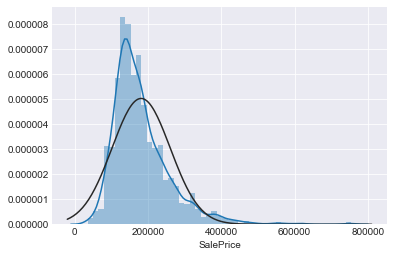

In [10]:
sns.distplot(train['SalePrice'], fit=norm)

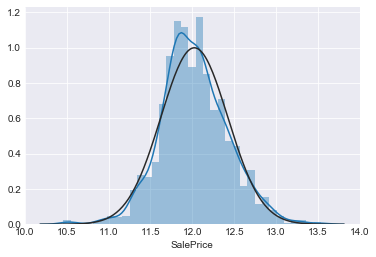

In [11]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)

In [12]:
y_train = train['SalePrice']
train.drop('SalePrice', axis=1, inplace=True)
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.shape

(2917, 79)

In [13]:
all_data_na = all_data.isnull().sum() / len(all_data) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
all_data_na.shape

(34,)

In [14]:
all_data_na.head(34)

PoolQC         99.691464
MiscFeature    96.400411
Alley          93.212204
Fence          80.425094
FireplaceQu    48.680151
LotFrontage    16.660953
GarageFinish    5.450806
GarageYrBlt     5.450806
GarageQual      5.450806
GarageCond      5.450806
GarageType      5.382242
BsmtExposure    2.811107
BsmtCond        2.811107
BsmtQual        2.776826
BsmtFinType2    2.742544
BsmtFinType1    2.708262
MasVnrType      0.822763
MasVnrArea      0.788481
MSZoning        0.137127
BsmtFullBath    0.068564
BsmtHalfBath    0.068564
Utilities       0.068564
Functional      0.068564
Exterior2nd     0.034282
Exterior1st     0.034282
SaleType        0.034282
BsmtFinSF1      0.034282
BsmtFinSF2      0.034282
BsmtUnfSF       0.034282
Electrical      0.034282
KitchenQual     0.034282
GarageCars      0.034282
GarageArea      0.034282
TotalBsmtSF     0.034282
dtype: float64

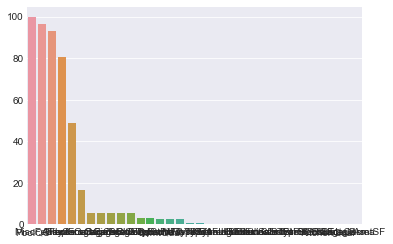

In [15]:
sns.barplot(x=all_data_na.index, y=all_data_na)

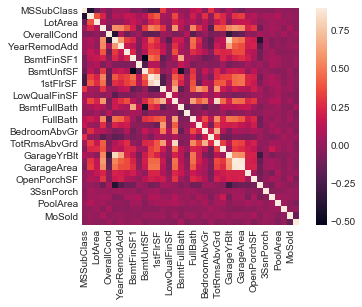

In [16]:
corrmat = train.corr() #without SalePrice
sns.heatmap(corrmat, vmax=0.9,square=True)

In [17]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
for col in ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']:
    all_data[col] = all_data[col].fillna('None')
for col in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    all_data[col] = all_data[col].fillna(0)
for col in ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    all_data[col] = all_data[col].fillna('None')
for col in ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']:
    all_data[col] = all_data[col].fillna(0)
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop('Utilities', axis=1)
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [18]:
all_data_na = all_data.isnull().sum() / len(all_data) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na.shape

(0,)

In [19]:
all_data.shape

(2917, 78)

In [20]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [21]:
from sklearn.preprocessing import LabelEncoder
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']#所有类别特征化
for col in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col] = lbl.transform(list(all_data[col].values))
all_data.shape

(2917, 78)

In [22]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalBath'] = all_data['BsmtFullBath'] + 0.5*all_data['BsmtHalfBath'] + all_data['FullBath'] + all_data['HalfBath']

In [25]:
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index
skewed_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_features

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
LandSlope         4.973254
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
LotFrontage       1.103039
GrLivArea         1.068750
TotalSF           1.009157
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
TotalBath         0.511735
HeatingQC         0.485534
FireplaceQu       0.332611
BedroomAbvGr      0.326568
GarageArea        0.216857
OverallQual       0.189591
FullBath          0.165514
MSSubClass        0.139709
YrSold            0.131996
BsmtFinType1      0.083641
G

In [27]:
skewed_features = skewed_features[abs(skewed_features)>0.75]
skewed_features.shape

(36,)

In [28]:
from scipy.special import boxcox1p
skewed_index = skewed_features.index
skewed_index

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', '1stFlrSF', 'LotFrontage', 'GrLivArea', 'TotalSF',
       'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtExposure', 'KitchenQual',
       'ExterQual', 'Fence', 'ExterCond', 'BsmtCond', 'PavedDrive',
       'BsmtFinType2', 'GarageQual', 'CentralAir', 'GarageCond', 'GarageYrBlt',
       'Functional', 'Street', 'PoolQC'],
      dtype='object')

In [30]:
lamda = 0.15
for i in skewed_index:
    all_data[i] = boxcox1p(all_data[i], lamda)

In [31]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 221)

In [32]:
train = all_data[:len(y_train)]
test = all_data[len(y_train):]
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return rmse

In [33]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
score.mean()

0.11633627517421077

In [34]:
model_xgb.fit(train, y_train)
xgb_pred = np.expm1(model_xgb.predict(test))
sub = pd.DataFrame()
sub['ID'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv', index=False)